# Visualizacion de data:  Estetica e interactiva.

In [1]:
import pandas as pd

In [4]:
# leer el archivo csv
df_population_row = pd.read_csv('population_total.csv')
# mostrar el dataframe
df_population_row

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


## Hacer una tabla pivote 

### .pivot()

In [8]:
# eliminar valores nulos
df_population_row.dropna(inplace=True)

In [21]:
# hacer tabla pivote
df_pivote = df_population_row.pivot(index='year',columns='country',
                        values='population')

In [23]:
# seleccionar algunos paises 
df_pivote = df_pivot[['United States','India','China','Brazil']]

In [20]:
# mostrar tabla pivote
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


In [68]:
# importar matplotlib
import matplotlib.pyplot as plt
df_pivot.to_excel('tabla_pivote.xlsx')

# Lineplot(grafico de linea) 

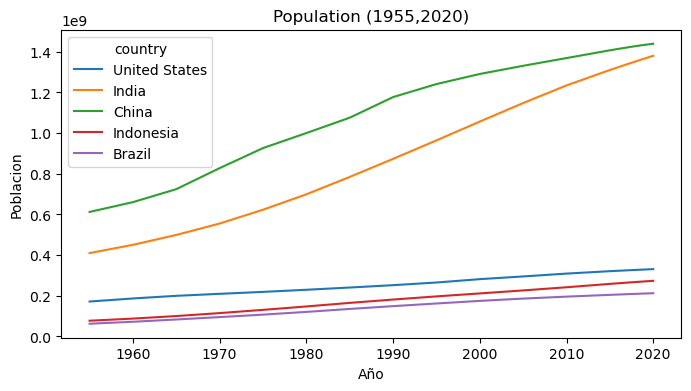

In [67]:
df_pivot.plot(kind='line',xlabel='Año',ylabel='Poblacion',
             title='Population (1955,2020)',figsize=(8,4))
# guardar figure
plt.savefig("my_test.png")
# mostrar plot
plt.show()

## Barplot(grafico de barra) 

### Barplot Separados

In [33]:
# seleccionando solo un año (2020)
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020.0])] 

In [34]:
# mostrando un dataframe
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [36]:
# trasponer un dataframe 
# (cambiando filas con columnas y vicerversa)
df_pivot_2020 = df_pivot_2020.T

<Axes: title={'center': 'Population (2020)'}, xlabel='Years', ylabel='Population'>

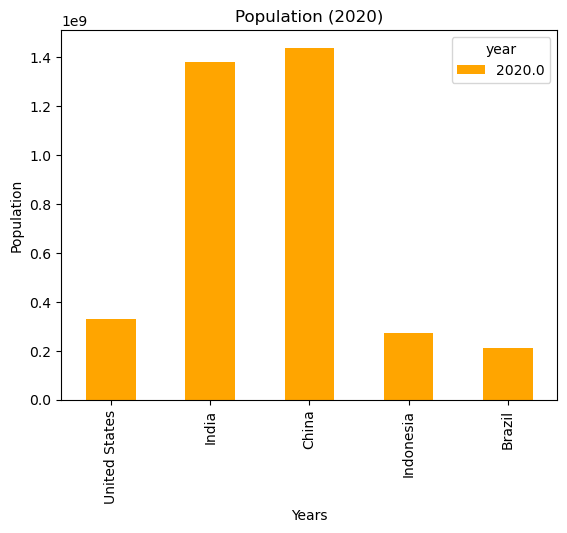

In [39]:
# hacer el barplot
df_pivot_2020.plot(kind='bar',color='orange',
                  xlabel='Years',ylabel='Population',
                  title='Population (2020)')

### Barplot agrupado por "n" variables

In [41]:
# seleccionar unos años
df_pivot_sample = df_pivot[df_pivot.index.isin([1980,1990,2000,2010,2020])] 

<Axes: xlabel='Years', ylabel='Population'>

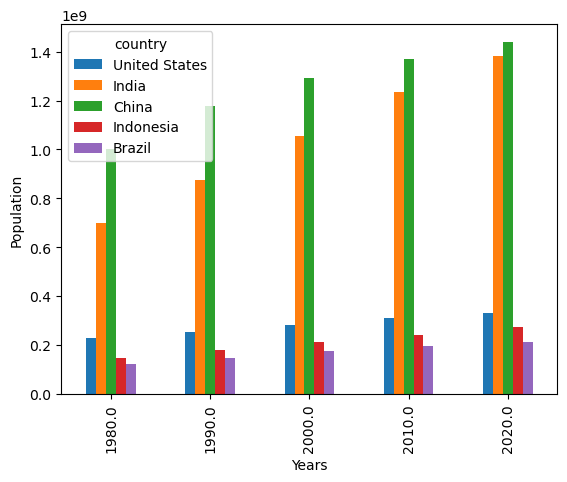

In [45]:
# haciendo barplot agrupados
df_pivot_sample.plot(kind='bar',
                  xlabel='Years',ylabel='Population')

### Piechart 

In [48]:
# cambiando el nombre de columna
df_pivot_2020.rename(columns={2020:'2020'},inplace=True)

<Axes: title={'center': 'Population (2020)'}, ylabel='2020'>

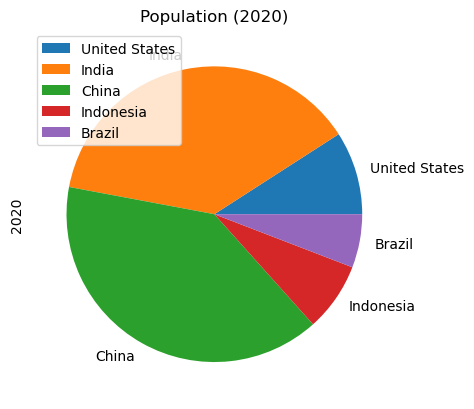

In [51]:
# haciendo el piechart
df_pivot_2020.plot(kind='pie', y='2020',title='Population (2020)')

# Boxplot :  es una grafica q nos muestra como la data esta distribuida.

<Axes: ylabel='Population'>

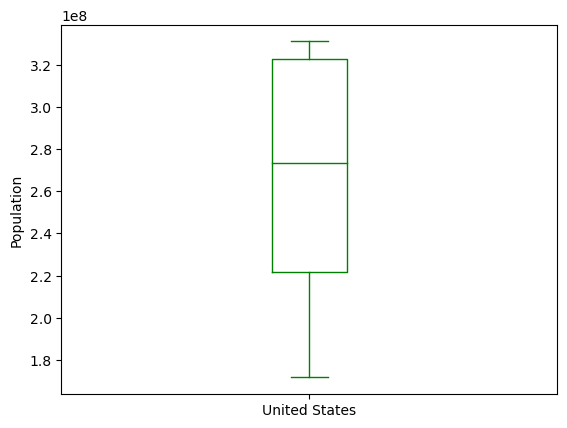

In [53]:
df_pivot['United States'].plot(kind='box',color='green',
                              ylabel='Population')

###  Multiples Boxplot

<Axes: >

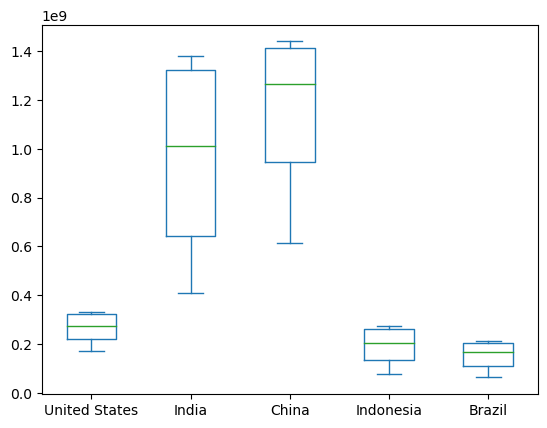

In [54]:
df_pivot.plot(kind='box')

# Histograma 

## Representa a una distribucion de frecuencia de un conjunto de data 

<Axes: ylabel='Frequency'>

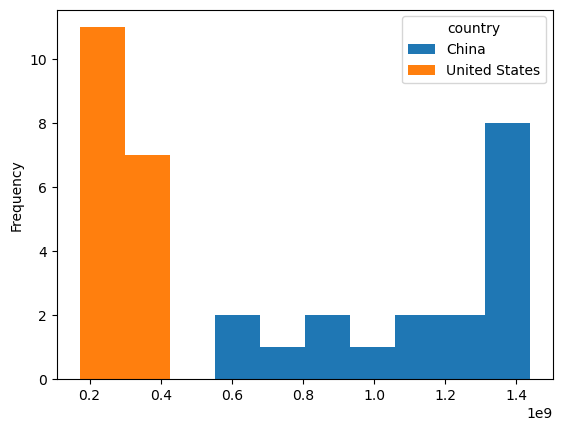

In [57]:
df_pivot[['China','United States']].plot(kind='hist')

#  ScatterPlot (grafico de dispercion)

###  usado para graficar los puntos de data para mostrar como una variable afecta a la otra

<Axes: xlabel='year', ylabel='population'>

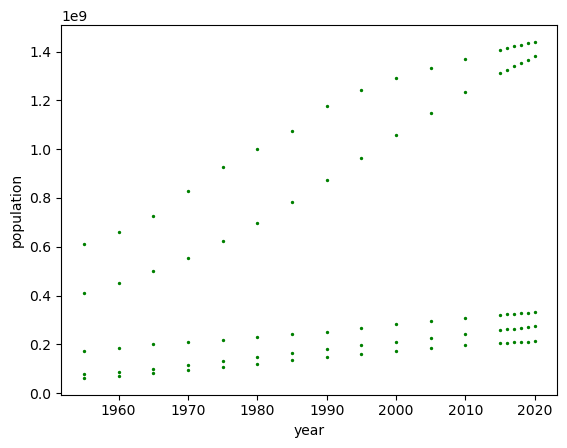

In [64]:
# seleccionar una muestra de la data
df_sample = df_population_row[df_population_row['country'].isin(['United States',
                                                     'India','China'
                                   ,'Indonesia','Brazil'])]
# haciendo el plot
df_sample.plot(kind='scatter',
               x='year',
               y='population',
              s=2,color='green')

## Visualizacion interactiva con pandas 

In [69]:
!pip install pandas 
!pip install plotly

In [71]:
!pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ------------------- ------------------ 41.0/81.7 kB 326.8 kB/s eta 0:00:01
     --------------------------------- ---- 71.7/81.7 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 415.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=7056622fc9111077d786426110b74d9618a5f3ad17f6152fbc61e6dde5b08ea6
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [73]:
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public',theme='white',offline=True)

In [74]:
pd.read_csv('population_total.csv')

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [84]:
df_population = pd.read_csv('population_total.csv')
df_population = df_population.dropna()
df_population = df_population.pivot(index='year',columns='country',
                    values='population')
df_population = df_population[['United States','India',
                               'China','Indonesia','Brazil']]
df_population

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


In [88]:
df_population.iplot(kind='line',xTitle='Year',yTitle='Population',
                   title='Year vs Population')

## Barplot
df_population_2020 = df_population[df_population.index.isin([2020)]

In [91]:
df_population_2020 = df_population[df_population.index.isin([2020])]

In [112]:
df_population_2020 = df_population_2020.T

In [111]:
df_population_2020.iplot(kind='bar',xTitle='Countrie',yTitle='Population',
                   title='Year vs Population')

In [100]:
df_population_sample = df_population[
    df_population.index.isin([1980,1990,2000,2010,2020])]
df_population_sample.iplot(kind='bar',xTitle='Population',
                           title='Year vs Population')

In [103]:
df_population['United States'].iplot(kind='box')

In [104]:
df_population.iplot(kind='box')

##  Histograma

In [105]:
df_population.iplot(kind='hist')

## Piechart 

In [116]:
df_population_2020 = df_population_2020.reset_index()
df_population_2020.rename(columns={2020:'2020'},inplace=True)

In [117]:
df_population_2020

year,index,country,2020
0,0,United States,3.310027e+08
1,1,India,1.380004e+09
2,2,China,1.439324e+09
3,3,Indonesia,2.735236e+08
4,4,Brazil,2.125594e+08


In [118]:
df_population_2020.iplot(kind='pie',labels='country',values='2020')

## Scatter plot 

In [119]:
df_population.iplot(kind='scatter', mode='markers',
                    xTitle='Year', yTitle='Population',
                    title='Year vs Population')